In [156]:
import mat4py
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import iplantuml
import plotly.graph_objects as go
import numpy as np

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'axes.unicode_minus': False,
})

# Force control (with stump)

In [270]:
data_force = mat4py.loadmat("SensorOutput_Force.mat")
newton = 9.80665

sensor_time = data_force["sensor_time"]
sensor_force = data_force["sensor_force"]
sensor_position = data_force["sensor_position"]
ref_position = data_force["ref_position"]

df_force = pd.DataFrame(data_force)
dataframe_sensor_time = pd.DataFrame(sensor_time)

# sensor force
dataframe_sensor_force = pd.DataFrame(sensor_force)
dataframe_sensor_force = dataframe_sensor_force * newton
dataframe_sensor_force["Time"] = dataframe_sensor_time
dataframe_sensor_force["Time"] = dataframe_sensor_force["Time"] - dataframe_sensor_force["Time"][0]

# sensor position
dataframe_sensor_position = pd.DataFrame(sensor_position)
dataframe_sensor_position["Time"] = dataframe_sensor_time
dataframe_sensor_position["Time"] = dataframe_sensor_position["Time"] - dataframe_sensor_position["Time"][0]

# sensor ref position
dataframe_ref_position = pd.DataFrame(ref_position)
dataframe_ref_position = dataframe_ref_position * newton
dataframe_ref_position["Time"] = dataframe_sensor_time
dataframe_ref_position["Time"] = dataframe_ref_position["Time"] - dataframe_ref_position["Time"][0]

In [271]:
dataframe_sensor_force

,0,1,2,3,4,5,Time
0,-3849.992723,4000.524801,0.000000,8.433719,-2385.271479,16.082906,0.000000
1,8.335653,20.986231,15.200307,8.433719,30.008349,16.082906,0.323887
2,8.237586,21.084297,15.200307,8.433719,30.008349,16.082906,0.413366
3,8.237586,21.084297,15.200307,8.433719,30.008349,16.082906,0.503142
4,8.237586,21.084297,15.102241,8.433719,30.008349,16.082906,0.593027
...,...,...,...,...,...,...,...
285,-292.826569,-294.493699,-308.419142,-300.083490,-287.432911,-329.699573,28.521052
286,-342.742417,-294.003367,-329.797640,-327.542110,-307.438477,-277.233995,28.619276
287,-341.663686,-244.675917,-292.826569,-297.827961,-274.684266,-193.387138,28.721447
288,-276.253331,-174.460303,-217.119231,-226.631681,-201.624724,-111.599677,28.819974


In [272]:
dataframe_sensor_force.diff()["Time"].mean()

0.10006315901037854

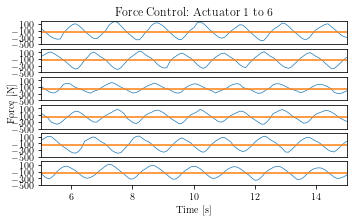

In [276]:
%matplotlib inline

text_width_in = 5.48053
text_width_cm = 13.91583
xmin = 5
xmax = 15
ymin = -50 * 10
ymax = 20 * 10
u = 5.5*0.55

# Clean up some bad data
dataframe_sensor_force[0][0] = 0
dataframe_sensor_force[1][0] = 0
dataframe_sensor_force[4][0] = 0

#fig = plt.figure(figsize=(15,10))
fig = plt.figure()
fig.set_size_inches(w=text_width_in, h=u)

# Force Control 1 - Socket or wood?
ax = plt.subplot(611)
plt.title('Force Control: Actuator 1 to 6')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_force[0],lw=0.7, label="Force sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[0], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Force [N]')
plt.xticks([], [])
plt.yticks(np.arange(-500, 200, step=200))
plt.xlim([xmin, 15])
plt.ylim([ymin, ymax])
# ax.legend(loc='upper right')

ax = plt.subplot(612)
# plt.title('Motor 2')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_force[1],lw=0.7, label="Force sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[1], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Force [N]')
plt.xticks([], [])
plt.yticks(np.arange(-500, 200, step=200))
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
# ax.legend(loc='upper right')

ax = plt.subplot(613)
# plt.title('Motor 3')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_force[2],lw=0.7, label="Force sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[2], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Force [N]')
plt.xticks([], [])
plt.yticks(np.arange(-500, 200, step=200))
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
# ax.legend(loc='upper right')

ax = plt.subplot(614)
# plt.title('Motor 4')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_force[3],lw=0.7, label="Force sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[3], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Force [N]')
plt.xticks([], [])
plt.yticks(np.arange(-500, 200, step=200))
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
# ax.legend(loc='upper right')

ax = plt.subplot(615)
# plt.title('Motor 5')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_force[4],lw=0.7, label="Force sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[4], label="Ref")
# plt.xlabel('Time [s]')
# plt.ylabel('Force [N]')
plt.xticks([], [])
plt.yticks(np.arange(-500, 200, step=200))
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
# ax.legend(loc='upper right')

ax = plt.subplot(616)
# plt.title('Motor 6')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_force[5],lw=0.7, label="Force sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[5], label="Ref")
plt.xlabel('Time [s]')
# plt.ylabel('Force [N]')
plt.yticks(np.arange(-500, 200, step=200))
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
# ax.legend(loc='upper center', bbox_to_anchor=(-0.14, -0.2), shadow=True, ncol=2)
fig.text(0.04, 0.5, 'Force [N]', va='center', rotation='vertical')
plt.savefig("Force_Control_Socket_reftol_5_verison_2.pgf", bbox_inches="tight", pad_inches=0)
plt.show()


# Force Control with Wood

In [257]:
data_force = mat4py.loadmat("SensorOutput_Force_wood.mat")

In [258]:
newton = 9.80665

sensor_time = data_force["sensor_time"]
sensor_force = data_force["sensor_force"]
sensor_position = data_force["sensor_position"]
ref_position = data_force["ref_position"]

df_force = pd.DataFrame(data_force)
dataframe_sensor_time = pd.DataFrame(sensor_time)

# sensor force
dataframe_sensor_force = pd.DataFrame(sensor_force)
dataframe_sensor_force = dataframe_sensor_force * newton
dataframe_sensor_force["Time"] = dataframe_sensor_time
dataframe_sensor_force["Time"] = dataframe_sensor_force["Time"] - dataframe_sensor_force["Time"][0]

# sensor position
dataframe_sensor_position = pd.DataFrame(sensor_position)
dataframe_sensor_position["Time"] = dataframe_sensor_time
dataframe_sensor_position["Time"] = dataframe_sensor_position["Time"] - dataframe_sensor_position["Time"][0]

# sensor ref position
dataframe_ref_position = pd.DataFrame(ref_position)
dataframe_ref_position = dataframe_ref_position * newton
dataframe_ref_position["Time"] = dataframe_sensor_time
dataframe_ref_position["Time"] = dataframe_ref_position["Time"] - dataframe_ref_position["Time"][0]

In [259]:
dataframe_sensor_force.diff()["Time"].mean()

0.10025614359169453

Average sample rate = $10Hz$

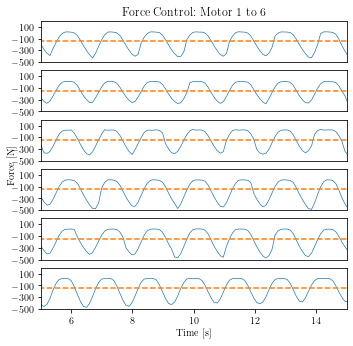

In [264]:
%matplotlib inline

text_width_in = 5.48053
text_width_cm = 13.91583
xmin = 5
xmax = 15
ymin = -50 * 10
ymax = 20 * 10

# Clean up some bad data
#dataframe_sensor_force[0][0] = 0
#dataframe_sensor_force[1][0] = 0
#dataframe_sensor_force[4][0] = 0

#fig = plt.figure(figsize=(15,10))
fig = plt.figure()
fig.set_size_inches(w=text_width_in, h=5.3)

# Force Control 1 - Socket or wood?
ax = plt.subplot(611)
plt.title('Force Control: Motor 1 to 6')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_force[0],lw=0.7, label="Force sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[0], label="Ref", linestyle='dashed')
# plt.xlabel('Time')
# plt.ylabel('Force [N]')
plt.xticks([], [])
plt.yticks(np.arange(-500, 200, step=200))
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
# ax.legend(loc='upper right')

ax = plt.subplot(612)
# plt.title('Motor 2')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_force[1],lw=0.7, label="Force sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[1], label="Ref", linestyle='dashed')
# plt.xlabel('Time')
# plt.ylabel('Force [N]')
plt.xticks([], [])
plt.yticks(np.arange(-500, 200, step=200))
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
# ax.legend(loc='upper right')

ax = plt.subplot(613)
# plt.title('Motor 3')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_force[2],lw=0.7, label="Force sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[2], label="Ref", linestyle='dashed')
# plt.xlabel('Time')
# plt.ylabel('Force [N]')
plt.xticks([], [])
plt.yticks(np.arange(-500, 200, step=200))
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
# ax.legend(loc='upper right')

ax = plt.subplot(614)
# plt.title('Motor 4')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_force[3],lw=0.7, label="Force sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[3], label="Ref", linestyle='dashed')
# plt.xlabel('Time')
# plt.ylabel('Force [N]')
plt.xticks([], [])
plt.yticks(np.arange(-500, 200, step=200))
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
# ax.legend(loc='upper right')

ax = plt.subplot(615)
# plt.title('Motor 5')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_force[4],lw=0.7, label="Force sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[4], label="Ref", linestyle='dashed')
# plt.xlabel('Time [s]')
# plt.ylabel('Force [N]')
plt.xticks([], [])
plt.yticks(np.arange(-500, 200, step=200))
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
# ax.legend(loc='upper right')

ax = plt.subplot(616)
# plt.title('Motor 6')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_force[5],lw=0.7, label="Force sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[5], label="Ref", linestyle='dashed')
plt.xlabel('Time [s]')
# plt.ylabel('Force [N]')
plt.yticks(np.arange(-500, 200, step=200))
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
# ax.legend(loc='upper center', bbox_to_anchor=(-0.14, -0.2), shadow=True, ncol=2)
fig.text(0.04, 0.5, 'Force [N]', va='center', rotation='vertical')
plt.savefig("Force_Control_Wood_reftol_5_zoomed_verison_2.pgf", bbox_inches="tight", pad_inches=0)
plt.show()

$$
f ≈ 0.75 Hz
$$

## Position Control
### Show run

In [248]:
data_position = mat4py.loadmat("SensorOutput_Position_Control.mat")

In [249]:
sensor_time = data_position["sensor_time"]
sensor_force = data_position["sensor_force"]
sensor_position = data_position["sensor_position"]
ref_position = data_position["ref_position"]

df_position = pd.DataFrame(data_position)
dataframe_sensor_time = pd.DataFrame(sensor_time)

# sensor force
dataframe_sensor_force = pd.DataFrame(sensor_force)
dataframe_sensor_force["Time"] = dataframe_sensor_time
dataframe_sensor_force["Time"] = dataframe_sensor_force["Time"] - dataframe_sensor_force["Time"][0]

# sensor position
dataframe_sensor_position = pd.DataFrame(sensor_position)
dataframe_sensor_position["Time"] = dataframe_sensor_time
dataframe_sensor_position["Time"] = dataframe_sensor_position["Time"] - dataframe_sensor_position["Time"][0]
## Scale to mm
dataframe_sensor_position[0] = dataframe_sensor_position[0] /10
dataframe_sensor_position[1] = dataframe_sensor_position[1] /10
dataframe_sensor_position[2] = dataframe_sensor_position[2] /10
dataframe_sensor_position[3] = dataframe_sensor_position[3] /10
dataframe_sensor_position[4] = dataframe_sensor_position[4] /10
dataframe_sensor_position[5] = dataframe_sensor_position[5] /10

# sensor ref position
dataframe_ref_position = pd.DataFrame(ref_position)
dataframe_ref_position["Time"] = dataframe_sensor_time
dataframe_ref_position["Time"] = dataframe_ref_position["Time"] - dataframe_ref_position["Time"][0]
## Scale to mm
dataframe_ref_position[0] = dataframe_ref_position[0] /10
dataframe_ref_position[1] = dataframe_ref_position[1] /10
dataframe_ref_position[2] = dataframe_ref_position[2] /10
dataframe_ref_position[3] = dataframe_ref_position[3] /10
dataframe_ref_position[4] = dataframe_ref_position[4] /10
dataframe_ref_position[5] = dataframe_ref_position[5] /10

In [250]:
dataframe_sensor_position

,0,1,2,3,4,5,Time
0,51.5,50.9,51.1,51.3,50.8,51.4,0.000000
1,51.5,50.9,51.1,51.3,50.8,51.4,0.001909
2,52.3,51.8,52.7,53.1,52.6,51.7,0.932303
3,52.3,51.8,52.8,53.1,52.8,53.3,0.940808
4,52.5,52.2,52.6,53.1,52.7,53.3,0.952614
...,...,...,...,...,...,...,...
6147,27.8,27.8,27.7,27.7,28.1,27.5,59.954385
6148,27.8,28.1,27.9,27.3,27.9,27.5,59.962743
6149,27.4,27.6,27.5,27.3,27.8,27.3,59.971187
6150,27.5,27.4,27.5,27.0,27.3,27.3,59.982946


In [251]:
dataframe_sensor_position.diff()["Time"].mean()

0.009753112191676107

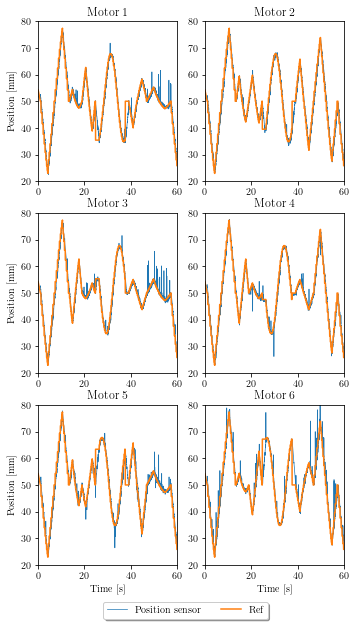

In [252]:
%matplotlib inline

#fig = plt.figure(figsize=(15,10))
fig = plt.figure()

fig.set_size_inches(w=5.48, h=10)
xmin = 0
xmax = 60

# Position Control 1 - Socket or wood?
ax = plt.subplot(321)
plt.title('Motor 1')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[0],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[0], label="Ref")
# plt.xlabel('Time')
plt.ylabel('Position [mm]')

plt.xlim([xmin, xmax])
plt.ylim([20, 80])

ax = plt.subplot(322)
plt.title('Motor 2')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[1],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[1], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Position [mm]')

plt.xlim([xmin, xmax])
plt.ylim([20, 80])
# ax.legend(loc='upper right')

ax = plt.subplot(323)
plt.title('Motor 3')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[2],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[2], label="Ref")
# plt.xlabel('Time')
plt.ylabel('Position [mm]')

plt.xlim([xmin, xmax])
plt.ylim([20, 80])
# ax.legend(loc='upper right')

ax = plt.subplot(324)
plt.title('Motor 4')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[3],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[3], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Position [mm]')

plt.xlim([xmin, xmax])
plt.ylim([20, 80])
# ax.legend(loc='upper right')

ax = plt.subplot(325)
plt.title('Motor 5')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[4],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[4], label="Ref")
plt.xlabel('Time [s]')
plt.ylabel('Position [mm]')

plt.xlim([xmin, xmax])
plt.ylim([20, 80])
# ax.legend(loc='upper right')

ax = plt.subplot(326)
plt.title('Motor 6')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[5],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[5], label="Ref")
plt.xlabel('Time [s]')
# plt.ylabel('Position [mm]')

plt.xlim([xmin, xmax])
plt.ylim([20, 80])
ax.legend(loc='upper center', bbox_to_anchor=(-0.14, -0.2), shadow=True, ncol=2)

plt.savefig("Position_Control_Free_reftol_0_5mm_5sec_speed50_60sec.png")
plt.show()

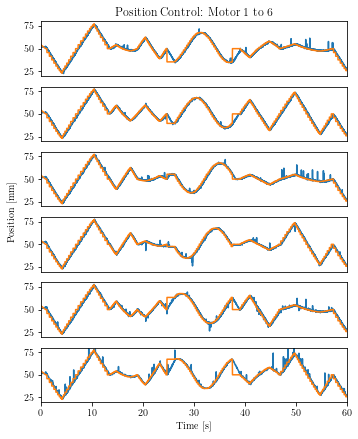

In [116]:
%matplotlib inline

#fig = plt.figure(figsize=(15,10))
fig = plt.figure()
text_width_in = 5.48053
text_width_cm = 13.91583

fig.set_size_inches(w=text_width_in, h=7)
xmin = 0
xmax = 60

# Position Control 1 - Socket or wood?
ax = plt.subplot(611)
plt.title('Position Control: Motor 1 to 6')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[0], label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[0], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Position [mm]')
plt.xticks([], [])

plt.xlim([xmin, xmax])
plt.ylim([20, 80])

ax = plt.subplot(612)
# plt.title('Motor 2')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[1], label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[1], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Position [mm]')

plt.xticks([], [])
plt.xlim([xmin, xmax])
plt.ylim([20, 80])
# ax.legend(loc='upper right')

ax = plt.subplot(613)
# plt.title('Motor 3')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[2], label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[2], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Position [mm]')

plt.xticks([], [])
plt.xlim([xmin, xmax])
plt.ylim([20, 80])
# ax.legend(loc='upper right')

ax = plt.subplot(614)
# plt.title('Motor 4')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[3], label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[3], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Position [mm]')

plt.xticks([], [])
plt.xlim([xmin, xmax])
plt.ylim([20, 80])
# ax.legend(loc='upper right')

ax = plt.subplot(615)
# plt.title('Motor 5')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[4], label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[4], label="Ref")
# plt.xlabel('Time [s]')
# plt.ylabel('Position [mm]')

plt.xticks([], [])
plt.xlim([xmin, xmax])
plt.ylim([20, 80])
# ax.legend(loc='upper right')

ax = plt.subplot(616)
# plt.title('Motor 6')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[5], label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[5], label="Ref")
plt.xlabel('Time [s]')
# plt.ylabel('Position [mm]')

plt.xlim([xmin, xmax])
plt.ylim([20, 80])
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), shadow=True, ncol=2)

#fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.04, 0.5, 'Position [mm]', va='center', rotation='vertical')

plt.savefig("Position_Control_Free_reftol_0_5mm_5sec_speed50_60sec_horizontal.pgf")
plt.show()

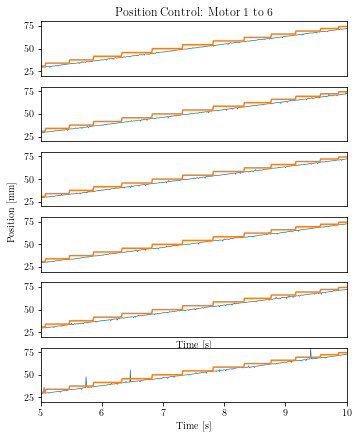

In [128]:
%matplotlib inline

#fig = plt.figure(figsize=(15,10))
fig = plt.figure()
text_width_in = 5.48053

fig.set_size_inches(w=text_width_in, h=7)

# Position Control 1 - Socket or wood?
ax = plt.subplot(611)
plt.title('Position Control: Motor 1 to 6')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[0],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[0], label="Ref")
plt.xticks([], [])
plt.xlim([5, 10])
plt.ylim([20, 80])

ax = plt.subplot(612)
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[1],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[1], label="Ref")
plt.xticks([], [])
plt.xlim([5, 10])
plt.ylim([20, 80])

ax = plt.subplot(613)
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[2],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[2], label="Ref")
plt.xticks([], [])
plt.xlim([5, 10])
plt.ylim([20, 80])

ax = plt.subplot(614)
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[3],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[3], label="Ref")
plt.xticks([], [])
plt.xlim([5, 10])
plt.ylim([20, 80])

ax = plt.subplot(615)
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[4],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[4], label="Ref")
plt.xlabel('Time [s]')
plt.xticks([], [])
plt.xlim([5, 10])
plt.ylim([20, 80])

ax = plt.subplot(616)
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[5],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[5], label="Ref")
plt.xlabel('Time [s]')

plt.xlim([5, 10])
plt.ylim([20, 80])
fig.text(0.04, 0.5, 'Position [mm]', va='center', rotation='vertical')

plt.savefig("Position_Control_Free_reftol_0_5mm_5sec_speed50_zoomed_6x1.pgf")
plt.show()

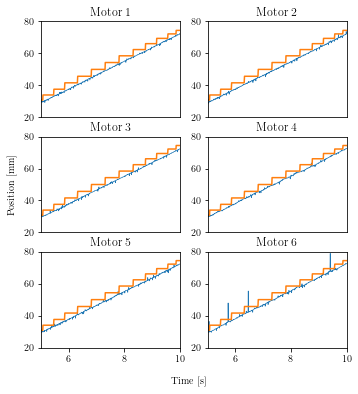

In [253]:
%matplotlib inline

#fig = plt.figure(figsize=(15,10))
fig = plt.figure()

fig.set_size_inches(w=5.48, h=6)

# Position Control 1 - Socket or wood?
ax = plt.subplot(321)
plt.title('Motor 1')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[0],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[0], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Position [mm]')
plt.xticks([], [])
plt.xlim([5, 10])
plt.ylim([20, 80])

ax = plt.subplot(322)
plt.title('Motor 2')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[1],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[1], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Position [mm]')
plt.xticks([], [])
plt.xlim([5, 10])
plt.ylim([20, 80])
# ax.legend(loc='upper right')

ax = plt.subplot(323)
plt.title('Motor 3')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[2],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[2], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Position [mm]')
plt.xticks([], [])
plt.xlim([5, 10])
plt.ylim([20, 80])
# ax.legend(loc='upper right')

ax = plt.subplot(324)
plt.title('Motor 4')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[3],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[3], label="Ref")
# plt.xlabel('Time')
# plt.ylabel('Position [mm]')
plt.xticks([], [])
plt.xlim([5, 10])
plt.ylim([20, 80])
# ax.legend(loc='upper right')

ax = plt.subplot(325)
plt.title('Motor 5')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[4],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[4], label="Ref")
# plt.xlabel('Time [s]')
# plt.ylabel('Position [mm]')

plt.xlim([5, 10])
plt.ylim([20, 80])
# ax.legend(loc='upper right')

ax = plt.subplot(326)
plt.title('Motor 6')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[5],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[5], label="Ref")
# plt.xlabel('Time [s]')
# plt.ylabel('Position [mm]')

plt.xlim([5, 10])
plt.ylim([20, 80])
#ax.legend(loc='upper center', bbox_to_anchor=(-0.14, -0.2), shadow=True, ncol=2)
fig.text(0.5, 0.04, 'Time [s]', ha='center')
fig.text(0.04, 0.5, 'Position [mm]', va='center', rotation='vertical')
plt.savefig("Position_Control_Free_reftol_0_5mm_5sec_speed50_zoomed_3x2.pgf")
plt.show()


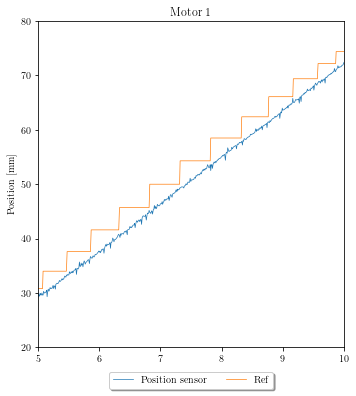

In [87]:
%matplotlib inline

#fig = plt.figure(figsize=(9,6))
fig = plt.figure()

fig.set_size_inches(w=5.48, h=6)

# Position Control 1 - Socket or wood?
ax = plt.subplot(111)
plt.title('Motor 1')
plt.plot(dataframe_sensor_force["Time"], dataframe_sensor_position[0],lw=0.7, label="Position sensor")
plt.plot(dataframe_ref_position["Time"], dataframe_ref_position[0],lw=0.7, label="Ref")
plt.ylabel('Position [mm]')

plt.xlim([5, 10])
plt.ylim([20, 80])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), shadow=True, ncol=2)

plt.savefig("Position_Control_Free_reftol_0_5mm_5sec_speed50_zoomed_1_one_ax.pgf")
plt.show()

# Scatterplots for stiffness measurements

In [225]:
import numpy as np

In [226]:
newton = 9.80665

# With Stump
distances = [-7.5, -9.5, -11.5]
data = [
    [-7.5, -1.42, -2.19, -2.21, -1.64, -3.20, -2.20],
    [-9.50, -0.93, -1.62, -1.53, -1.16, -2.63, -1.55],
    [-11.5, -6.00, -1.63, -5.66, -5.89, -0.86, -6.00],
]
cols = ["Distance", "M1","M2","M3","M4","M5","M6"]
df_stump_1 = pd.DataFrame(data, columns=cols)
df_stump_1["M1"] = df_stump_1["M1"] * newton
df_stump_1["M2"] = df_stump_1["M2"] * newton
df_stump_1["M3"] = df_stump_1["M3"] * newton
df_stump_1["M4"] = df_stump_1["M4"] * newton
df_stump_1["M5"] = df_stump_1["M5"] * newton
df_stump_1["M6"] = df_stump_1["M6"] * newton

df_stump_1

,Distance,M1,M2,M3,M4,M5,M6
0,-7.5,-13.925443,-21.476563,-21.672696,-16.082906,-31.381280,-21.574630
1,-9.5,-9.120185,-15.886773,-15.004174,-11.375714,-25.791489,-15.200307
2,-11.5,-58.839900,-15.984839,-55.505639,-57.761168,-8.433719,-58.839900


In [242]:
%matplotlib widget
max_dist = round(max(distances)) +2
min_dist = round(min(distances))
#fig = plt.figure(figsize=(9,6))
fig = plt.figure()
#fig.set_size_inches(w=5.48, h=6)

ax = plt.subplot(321)
x = df_stump_1.Distance
y = df_stump_1.M1
model = np.polyfit(x, y, 1)
predict = np.poly1d(model)
x_lin_reg = range(min_dist, max_dist)
y_lin_reg = predict(x_lin_reg)
plt.plot(x, y, "o")
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.title('Motor 1')

plt.xticks([], [])
# plt.xlim([5, 10])
plt.ylim([-60, 0])

ax = plt.subplot(322)
x = df_stump_1.Distance
y = df_stump_1.M2
model = np.polyfit(x, y, 1)
predict = np.poly1d(model)
x_lin_reg = range(min_dist, max_dist)
y_lin_reg = predict(x_lin_reg)
plt.plot(x, y, "o")
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.title('Motor 2')

plt.xticks([], [])
# plt.xlim([5, 10])
plt.ylim([-60, 0])

ax = plt.subplot(323)
x = df_stump_1.Distance
y = df_stump_1.M3
model = np.polyfit(x, y, 1)
predict = np.poly1d(model)
x_lin_reg = range(min_dist, max_dist)
y_lin_reg = predict(x_lin_reg)
plt.plot(x, y, "o")
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.title('Motor 3')

plt.xticks([], [])
# plt.xlim([5, 10])
plt.ylim([-60, 0])

ax = plt.subplot(324)
x = df_stump_1.Distance
y = df_stump_1.M4
model = np.polyfit(x, y, 1)
predict = np.poly1d(model)
x_lin_reg = range(min_dist, max_dist)
y_lin_reg = predict(x_lin_reg)
plt.plot(x, y, "o")
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.title('Motor 4')

plt.xticks([], [])
# plt.xlim([5, 10])
plt.ylim([-60, 0])

ax = plt.subplot(325)
x = df_stump_1.Distance
y = df_stump_1.M5
model = np.polyfit(x, y, 1)
predict = np.poly1d(model)
x_lin_reg = range(min_dist, max_dist)
y_lin_reg = predict(x_lin_reg)
plt.plot(x, y, "o")
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.title('Motor 5')
# plt.xlim([5, 10])
plt.ylim([-60, 0])

ax = plt.subplot(326)
x = df_stump_1.Distance
y = df_stump_1.M6
model = np.polyfit(x, y, 1)
predict = np.poly1d(model)
x_lin_reg = range(min_dist, max_dist)
y_lin_reg = predict(x_lin_reg)
plt.plot(x, y, "o")
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.title('Motor 6')
# plt.xlim([5, 10])
plt.ylim([-60, 0])
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), shadow=True, ncol=2)

fig.text(0.5, 0.04, 'Distance [mm]', ha='center')
fig.text(0.04, 0.5, 'Force [N]', va='center', rotation='vertical')

plt.savefig("scatter_ex.png")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …